In [95]:
import pandas as pd
df = pd.read_csv("train dataset.csv")
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [96]:
#conversion 
# for i in range(df.shape[0]):
#     if df.loc[i,'Gender'] == "Male":
#         df.loc[i,'Gender'] = 1
#     else:
#         df.loc[i,'Gender'] = 0
# df.head()

In [97]:
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
#Euclidean distance
def euclidean_distance(p1,p2):
    dist = np.sqrt(np.sum((p1 - p2)**2))
    return dist


In [98]:
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split


#Func to calculate knn
def knn_predict(x_train,y,x_input,k):
    op_labels = []
    for item in x_input:
        point_dist = []
        for j in range(len(x_train)):
            distances = euclidean_distance(np.array(x_train[j,:]),item)
            point_dist.append(distances)
            
        point_dist = np.array(point_dist)
      
        #print(point_dist)
        
        dist = np.argsort(point_dist)[:k]
        
        labels = y[dist]
#         print(labels)
        lab = mode(labels)
        lab = lab.mode[0]
        op_labels.append(lab)
       
    return op_labels  
        

In [99]:
X=df.drop(["Personality","Gender","Age"],axis=1)
y =df.Personality

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=10)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)



In [102]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(1,41):
    y_pred= knn_predict(x_train,y_train,x_test,i)
    accuracy.append([i,accuracy_score(y_test,y_pred)*200])
accuracy    
    

[[1, 65.625],
 [2, 58.59375],
 [3, 58.59375],
 [4, 58.59375],
 [5, 65.625],
 [6, 60.9375],
 [7, 60.9375],
 [8, 64.84375],
 [9, 62.5],
 [10, 65.625],
 [11, 60.15625],
 [12, 63.28125],
 [13, 60.9375],
 [14, 57.8125],
 [15, 63.28125],
 [16, 62.5],
 [17, 65.625],
 [18, 67.96875],
 [19, 66.40625],
 [20, 64.84375],
 [21, 64.0625],
 [22, 67.96875],
 [23, 67.96875],
 [24, 65.625],
 [25, 69.53125],
 [26, 66.40625],
 [27, 62.5],
 [28, 62.5],
 [29, 63.28125],
 [30, 65.625],
 [31, 67.1875],
 [32, 67.1875],
 [33, 65.625],
 [34, 67.1875],
 [35, 70.3125],
 [36, 67.1875],
 [37, 69.53125],
 [38, 67.96875],
 [39, 67.1875],
 [40, 69.53125]]

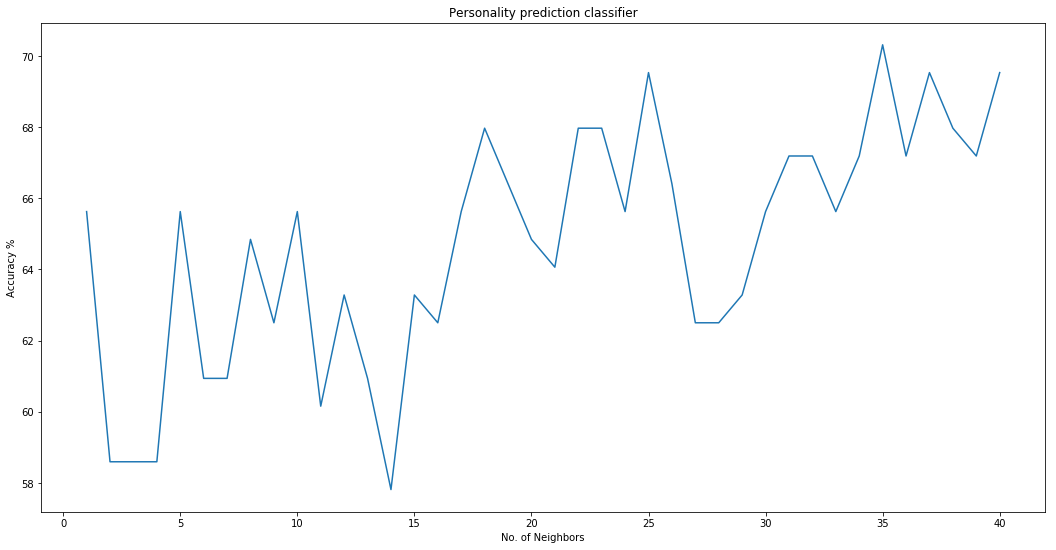

In [103]:
# plt.plot()
import matplotlib.pyplot as plt
x_axis = []
y_axis = []
for item in accuracy:
    x_axis.append(item[0])
    y_axis.append(item[1])
plt.figure(figsize = (18,9))
plt.title('Personality prediction classifier')
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy %')
plt.plot(x_axis,y_axis)    